# Inspection

For the most part, this notebook will just be a tidied up version of the raspberry pi performance notebook. The main objective I have in mind here is to take all of the investigation I did in the mentioned notebook and then creating more visually clean graphs and try to convey the information across effectively.

## Imports

Here I am importing everything that will be used throughout the notebook. If I am importing something that will only be used in a specific place, I will import the library there rather than here.

In [1]:
import os.path

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

First begin some basic file keeping. I want to make sure that I have all the test results where I expect them to be. If the test results don't exist, the entire notebook is useless.

In [2]:
path = '../Input/Docker'
zipFile = '../Input/Docker.zip'
docker = []

if (os.path.isdir(path)): # Check that the directory exists
    docker = os.listdir(path)

elif (os.path.isfile(zipFile)): # If directory doesn't exist, check that a zipfile exists
    
    import zipfile
    with zipfile.ZipFile(zipFile, 'r') as zip_ref:
        zip_ref.extractall(path)
        
    docker = os.listdir(path)

else: # Neither zipfile or directory exists so error
    print('Look to see if Docker test results are in the input folder')
    
for i in range(len(docker)):
    docker[i] = path + '/' + docker[i]
    
docker.sort()

Now, I want to check that a results folder exists

In [3]:
dockerResults = '../Results/Docker'

if not os.path.exists(dockerResults): # There is a race condition here.
    os.makedirs(dockerResults)        # Make sure you don't create a folder while running this

else:
    pass

Now, I will want to start actually parsing the data that the Docker tests have given me

In [6]:
import sys
sys.path.insert(1, r'./../Python')
from helper import *

resultPath = ['../Results/Docker/result1.txt', '../Results/Docker/result2.txt',
             '../Results/Docker/result3.txt', '../Results/Docker/result4.txt',
             '../Results/Docker/result5.txt', '../Results/Docker/result6.txt',]

avoid = ["top", "Tasks", "%Cpu(s)", "KiB Mem", "KiB Swap"]

for i in range(len(resultPath)):
    parseTop(docker[i], resultPath[i], avoid)

In [7]:
dCPU1, dMEM1 = readFile(resultPath[0])
dCPU2, dMEM2 = readFile(resultPath[1])
dCPU3, dMEM3 = readFile(resultPath[2])
dCPU4, dMEM4 = readFile(resultPath[3])
dCPU5, dMEM5 = readFile(resultPath[4])
dCPU6, dMEM6 = readFile(resultPath[5])

PID for main are:

test1 = 13058

test2 = 942

test3 = 947

test4 = 945

test5 = 962

test 6 = 929

Now, I've stored all of the mains into a numpy array for convenience.

In [11]:
mains = ['13058', '942', '947', '945', '962', '929']

main1 = np.array(dCPU1[mains[0]])
main2 = np.array(dCPU2[mains[1]])
main3 = np.array(dCPU3[mains[2]])
main4 = np.array(dCPU4[mains[3]])
main5 = np.array(dCPU5[mains[4]])
main6 = np.array(dCPU6[mains[5]])

Now, I want to create a graph that conveys the information I want. I want to create a graph that shows the mean value of the signals as well as the standard deviation at the same time. To begin with, I start by calculating the standard deviation and the mean for every point in time.

In [13]:
mean = []
std = []

for i in range(100):
    value = np.array([main1[i], main2[i], main3[i], main4[i], main5[i], main6[i]])
    mean.append(np.mean(value))
    std.append(np.std(value))
    
mean = np.array(mean)
std = np.array(std)

Now, I graph

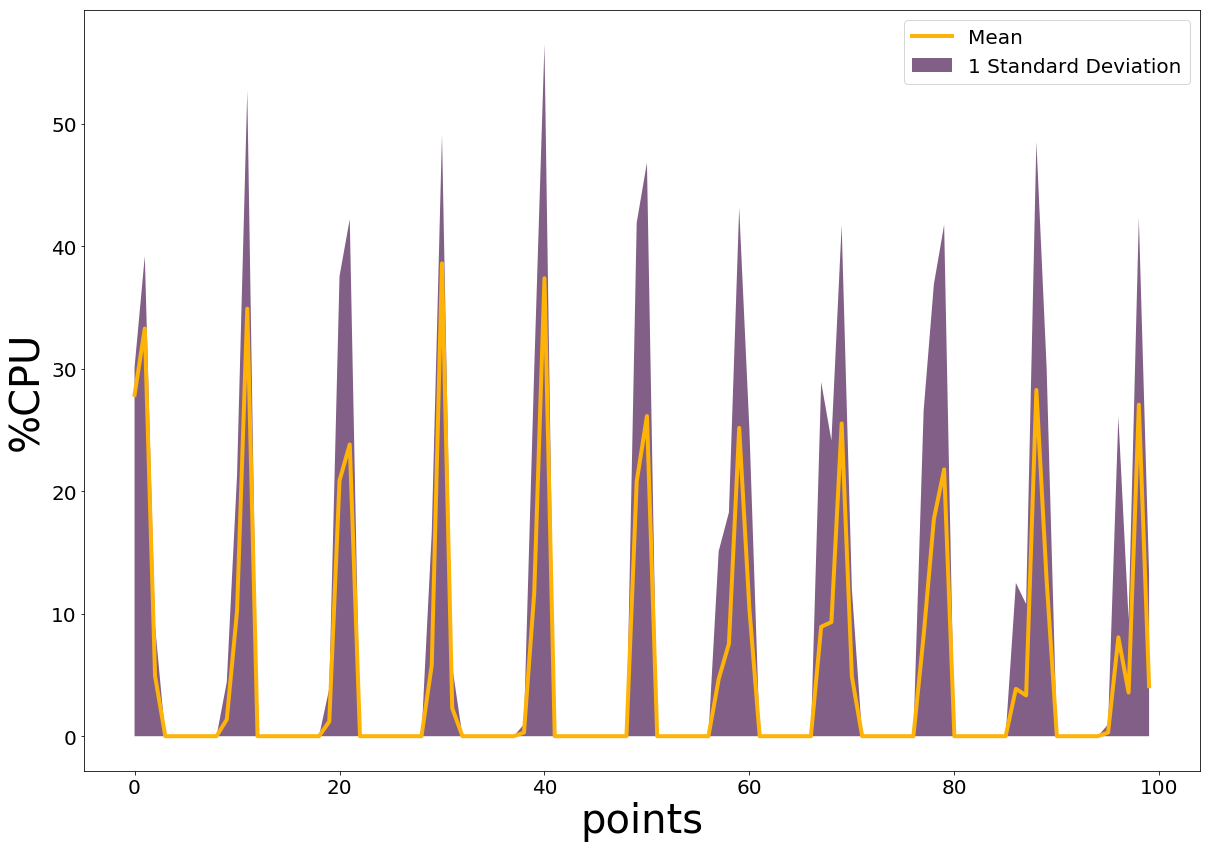

In [14]:
C = ["#7bb274", "#a8a495", "#feb308", "#3778bf", "#825f87", '#d9544d', '#ffff7e', '#3b5b92']

fig = plt.figure(figsize = (20, 14))
ax = fig.add_subplot(111, label = "Comparison")

points = np.arange(0, len(mean))

ax.plot(points, mean, color = C[2], label = 'Mean',    linewidth = 4)
ax.fill_between(points, mean + std, facecolor = C[4], label = "1 Standard Deviation")
ax.set_ylabel('%CPU', fontsize = 40)
ax.set_xlabel('points', fontsize = 40)

ax.legend(prop = {'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)

plt.show()

# Box Plots

To graph a box plot, I need the minimum, maximum, median and quartiles.

In [54]:
# I do a list comprehension here to remove all 0s
# The reason I do this is because the median, 1st quartile
# and 4th quartile are all 0 if I don't
# The information I get with the 0s in is not useful
m1 = [x for x in main1 if x > 0]
m2 = [x for x in main2 if x > 0]
m3 = [x for x in main3 if x > 0]
m4 = [x for x in main4 if x > 0]
m5 = [x for x in main5 if x > 0]
m6 = [x for x in main6 if x > 0]

median1 = np.median(m1)
median2 = np.median(m2)
median3 = np.median(m3)
median4 = np.median(m4)
median5 = np.median(m5)
median6 = np.median(m6)
median = [median1, median2, median3, median4, median5, median6]

max1 = max(m1)
max2 = max(m2)
max3 = max(m3)
max4 = max(m4)
max5 = max(m5)
max6 = max(m6)
ma = [max1, max2, max3, max4, max5, max6]

min1 = min(m1)
min2 = min(m2)
min3 = min(m3)
min4 = min(m4)
min5 = min(m5)
min6 = min(m6)
mi = [min1, min2, min3, min4, min5, min6]

q11 = np.percentile(m1, 25)
q12 = np.percentile(m2, 25)
q13 = np.percentile(m3, 25)
q14 = np.percentile(m4, 25)
q15 = np.percentile(m5, 25)
q16 = np.percentile(m6, 25)
q1 = [q11, q12, q13, q14, q15, q16]

q31 = np.percentile(m1, 75)
q32 = np.percentile(m2, 75)
q33 = np.percentile(m3, 75)
q34 = np.percentile(m4, 75)
q35 = np.percentile(m5, 75)
q36 = np.percentile(m6, 75)
q3 = [q31, q32, q33, q34, q35, q36]

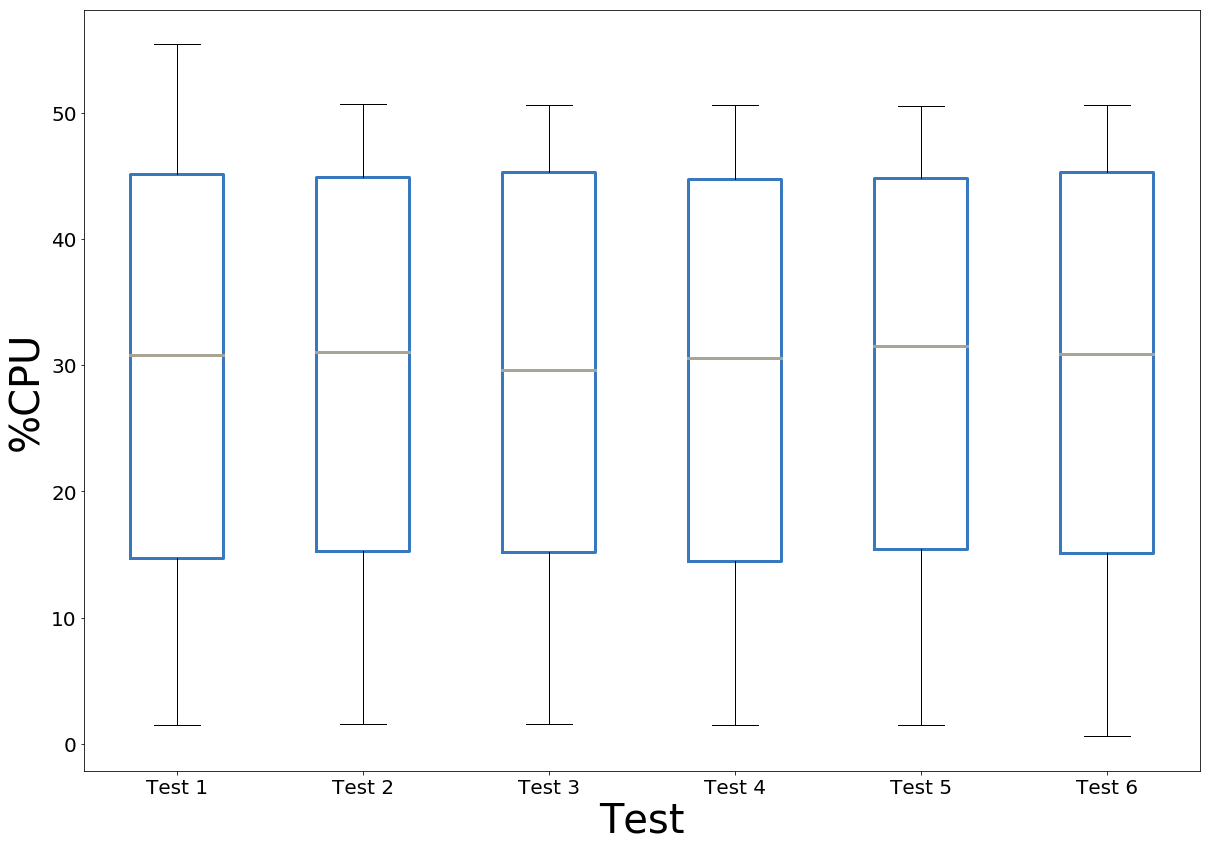

In [71]:
import matplotlib.cbook as cbook

data = [main1, main2, main3, main4, main5, main6]
labels = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6']

stats1 = cbook.boxplot_stats(data, labels = labels)

for n in range(len(stats1)):
    stats1[n]['med'] = median[n]
    stats1[n]['q1'] = q1[n]
    stats1[n]['q3'] = q3[n]
    stats1[n]['whislo'] = mi[n]
    stats1[n]['whishi'] = ma[n]

boxprops = dict(linewidth = 3, color = C[3])    
medianprops = dict(linewidth = 3, color = C[1])

fig, axes = plt.subplots(figsize=(20, 14))
bplot1 = axes.bxp(stats1, showfliers = False, boxprops = boxprops, medianprops = medianprops)

axes.set_ylabel('%CPU', fontsize = 40)
axes.set_xlabel('Test', fontsize = 40)

axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)

plt.show()